<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/Logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('default.csv', na_values='?').dropna()
df.head()

,id,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   default  10000 non-null  object 
 2   student  10000 non-null  object 
 3   balance  10000 non-null  float64
 4   income   10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


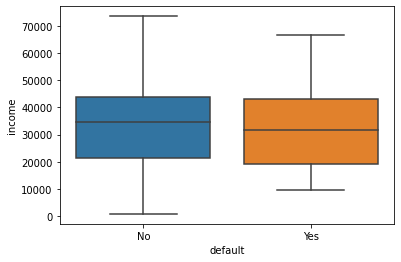

In [ ]:
sns.boxplot(x='default', y='income', data=df)
plt.show()

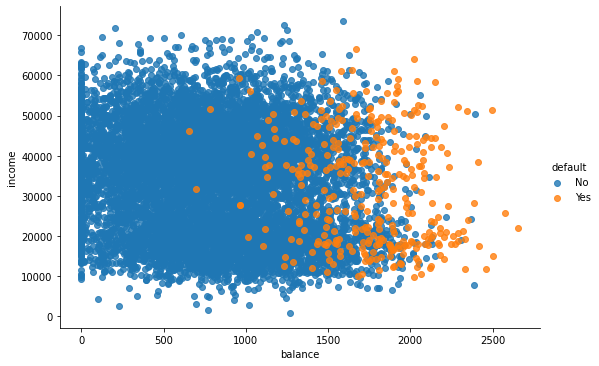

In [ ]:
sns.lmplot(x='balance', y='income', hue = 'default', data=df, aspect=1.5, fit_reg = False)
plt.show()

In [ ]:
pd.crosstab(df['default'], df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


In [ ]:
# Convert Categorical to Numerical for class attribute
default_dummies = pd.get_dummies(df.default, prefix='default')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
default_dummies
data_default = pd.concat([df[['student','balance','income']], default_dummies], axis=1)
data_default.head()

,student,balance,income,default_Yes
0,No,729.526495,44361.62507,0
1,Yes,817.180407,12106.13470,0
2,No,1073.549164,31767.13895,0
3,No,529.250605,35704.49394,0
4,No,785.655883,38463.49588,0


In [ ]:
# fitting the model with balance
model1 = smf.glm('default_Yes~balance', data=data_default, family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Mon, 14 Jun 2021   Deviance:                       1596.5
Time:                        18:38:17   Pearson chi2:                 7.15e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================
"""

In [ ]:
# fitting the model with student
model2 = smf.glm('default_Yes~student', data=data_default, family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.3
Date:                Mon, 14 Jun 2021   Deviance:                       2908.7
Time:                        18:38:19   Pearson chi2:                 1.00e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [ ]:
# fitting the model with student+balance
model3 = smf.glm('default_Yes~student+balance+income', data=data_default, family=sm.families.Binomial()).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Mon, 14 Jun 2021   Deviance:                       1571.5
Time:                        18:38:21   Pearson chi2:                 7.00e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==================================================================================
"""

In [ ]:
# print odd-ratio
print(np.exp(model3.params))

Intercept         0.000019
student[T.Yes]    0.523732
balance           1.005753
income            1.000003
dtype: float64


In [ ]:
L1=model1.deviance
L2=model2.deviance
L3=model3.deviance
print(L1)
print(L2)
print(L3)

1596.4516835489283
2908.683063975038
1571.5448276347668


In [ ]:
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))


LR = likelihood_ratio(L3,L1)


p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print('p: %.30f' % p) 


p: 0.000000000001690583572870528825


In [ ]:
#prediction
predict = model3.predict() #ทดสอบด้วย full training set

#define the cutoff
cutoff = 0.5
#Assign class
y_predict = np.where(predict > cutoff, 1, 0)
y_predict
#actual class
y_actual = data_default['default_Yes']

#result= pd.concat([pd.DataFrame({'y_actual':y_actual}),pd.DataFrame({'y_predicted':y_predict})],axis=1)
#result
#result.to_csv(r'result_default.csv')

In [ ]:
#creating a confusion matrix to understand the classification
confusion = confusion_matrix(y_actual, y_predict)
confusion
#[row, column]
#TP = confusion[1, 1]
#TN = confusion[0, 0]
#FP = confusion[0, 1]
#FN = confusion[1, 0]
#print ("TP",TP)
#print ("TN",TN)
#print ("FN",FN)
#print ("FP",FP)


array([[9627,   40],
       [ 228,  105]])

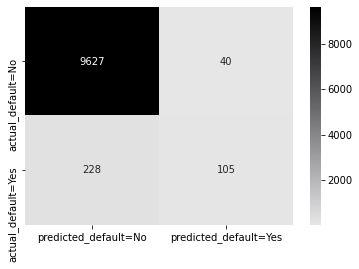

In [ ]:
#print confusion matrix 
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, 
                             light=0.9, dark=0, as_cmap=True)
sns.heatmap(confusion,cmap = cmap,xticklabels=['predicted_default=No',
                                          'predicted_default=Yes'],
            yticklabels=['actual_default=No',
                         'actual_default=Yes'],annot=True, fmt="d")

In [ ]:
#splitting the data into train and test with 70:30 ratio
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(data_default, test_size=0.30, random_state=13)

In [ ]:
Train.head()
Test.head()

,student,balance,income,default_Yes
5952,No,319.807607,45202.63540,0
1783,Yes,1123.595047,16082.90571,0
4811,No,1210.176036,29460.19160,0
145,No,95.147680,51371.19991,0
7146,No,1329.096762,60321.61321,0


In [ ]:
#10-fold crossvalidation
for i in range(1,11):
    train_df = df.sample(8000, random_state = i)
    test_df = df[~df.isin(train_df)].dropna(how = 'all')
    
    # Fit a logistic regression to predict default using balance
    model = smf.glm('default~student+balance', data=train_df, family=sm.families.Binomial())
    result = model.fit()
    predictions_nominal = [ "Yes" if x < 0.5 else "No" for x in result.predict(test_df)]
    print("----------------")
    print("Random Seed = " + str(i) + "")
    print("----------------")
    print(confusion_matrix(test_df["default"], 
                       predictions_nominal))
    print(classification_report(test_df["default"], 
                            predictions_nominal, 
                            digits = 3))
    print()

----------------
Random Seed = 1
----------------
[[1920    7]
 [  48   25]]
              precision    recall  f1-score   support

          No      0.976     0.996     0.986      1927
         Yes      0.781     0.342     0.476        73

    accuracy                          0.973      2000
   macro avg      0.878     0.669     0.731      2000
weighted avg      0.969     0.973     0.967      2000


----------------
Random Seed = 2
----------------
[[1921   11]
 [  47   21]]
              precision    recall  f1-score   support

          No      0.976     0.994     0.985      1932
         Yes      0.656     0.309     0.420        68

    accuracy                          0.971      2000
   macro avg      0.816     0.652     0.703      2000
weighted avg      0.965     0.971     0.966      2000


----------------
Random Seed = 3
----------------
[[1919   13]
 [  48   20]]
              precision    recall  f1-score   support

          No      0.976     0.993     0.984      1932
    

Assignment: Do split test for default dataset and show 
1.   Confusion matrix
2.   Classification Accuracy: Overall, how often is the classifier correct?
3.   Classification Error: Overall, how often is the classifier incorrect?
4.   Sensitivity or Recall: When the actual value is positive, how often is the prediction correct?.
5.   Specificity: When the actual value is negative, how often is the prediction correct?


In [ ]:
#TYPE COEDE HERE
model4 = smf.glm('default_Yes~student+balance', data=Train, family=sm.families.Binomial()).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -513.60
Date:                Mon, 14 Jun 2021   Deviance:                       1027.2
Time:                        18:38:53   Pearson chi2:                 4.45e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.2642      0.478    -23.588      0.000     -12.200     -10.328
student[T.Yes]    -0.8197      0.183     -4.480      0.000      -1.178      -0.461
balance            0.0061      0.000     20.293      0.000       0.005       0.007
==================================================================================
"""

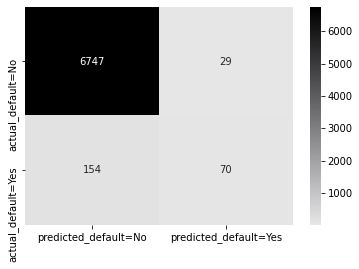

In [ ]:
#1.Confusion matrix
#prediction
predict_test = model4.predict()
cutoff = 0.5
y_predict_test = np.where(predict_test > cutoff, 1, 0)
y_actual_test = Train['default_Yes']
confusion = confusion_matrix(y_actual_test, y_predict_test)

#print confusion matrix 
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, 
                             light=0.9, dark=0, as_cmap=True)
sns.heatmap(confusion,cmap = cmap,xticklabels=['predicted_default=No',
                                          'predicted_default=Yes'],
            yticklabels=['actual_default=No',
                         'actual_default=Yes'],annot=True, fmt="d")

In [ ]:
#2.Classification Accuracy: Overall, how often is the classifier correct?
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

accuracy = ((TP+TN)/(TP + TN + FP + FN))
accuracy

0.9738571428571429

In [ ]:
#3.Classification Error: Overall, how often is the classifier incorrect?
classifier_incorrect = 1 - accuracy
classifier_incorrect

0.026142857142857134

In [ ]:
#4.Sensitivity or Recall: When the actual value is positive, how often is the prediction correct?.
Sensitivity = (TP/(TP + FN))
Sensitivity

0.3125

In [ ]:
#5.Specificity: When the actual value is negative, how often is the prediction correct?
Specificity = (TN/(TN + FP))
Specificity

0.9957201889020071

References:
https://onezero.blog/modelling-binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation/
https://www.pluralsight.com/guides/interpreting-data-using-statistical-models-python